## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2


Assignment 2 is worth 15% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


### Question 1



1) Read the white wine as a pandas dataframe and name it wine_data_white. **Display the first 3 rows of wine_data_white.**
<br>
2) Read the red wine as a pandas dataframe and name it wine_data_red. **Display the first 3 rows of wine_data_red.**
<br>
3) Join the wine_data_red and wine_data_white datasets by adding the rows of one to the other. Name the joined dataframe wine_data. **Display the total number of rows and columns in the wine_data dataframe.**


The following questions will be evaluated for wine_data. (2 points)



In [519]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [520]:
wine_data_white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" , sep= ";")
wine_data_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" , sep= ";")
print("The first three records of wine_data_white\n" , wine_data_white.head(3))
print("The first three records of wine_data_red\n" ,wine_data_red.head(3))
wine_data = pd.concat([wine_data_red,wine_data_white])
print(wine_data.shape)

The first three records of wine_data_white
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
The first three records of wine_data_red
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             

### Question 2
Check the data types of the attributes. (2 points)

In [521]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [522]:
print(wine_data.isnull().sum())
print("There are no missing values")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
There are no missing values


### Question 4

Ignoring the quality column (a categorical column), display the pearson correlation between all the attributes? (8 points)

In [523]:
pcorr = pd.DataFrame()
names = []
for i in wine_data:
    names.append(i)
    temp = []
    for j in wine_data:
        corr,_ = pearsonr(wine_data[i],wine_data[j])
        temp.append(corr)
    pcorr.insert(0, i, temp, True)
pcorr.index = names
display(pcorr)

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
fixed acidity,-0.076743,-0.095452,0.299568,-0.252700,0.458910,-0.329054,-0.282735,0.298195,-0.111981,0.324436,0.219008,1.000000
volatile acidity,-0.265699,-0.037640,0.225984,0.261454,0.271296,-0.414476,-0.352557,0.377124,-0.196011,-0.377981,1.000000,0.219008
citric acid,0.085532,-0.010493,0.056197,-0.329808,0.096154,0.195242,0.133126,0.038998,0.142451,1.000000,-0.377981,0.324436
residual sugar,-0.036980,-0.359415,-0.185927,-0.267320,0.552517,0.495482,0.402871,-0.128940,1.000000,0.142451,-0.196011,-0.111981
chlorides,-0.200666,-0.256916,0.395593,0.044708,0.362615,-0.279630,-0.195045,1.000000,-0.128940,0.038998,0.377124,0.298195
free sulfur dioxide,0.055463,-0.179838,-0.188457,-0.145854,0.025717,0.720934,1.000000,-0.195045,0.402871,0.133126,-0.352557,-0.282735
total sulfur dioxide,-0.041385,-0.265740,-0.275727,-0.238413,0.032395,1.000000,0.720934,-0.279630,0.495482,0.195242,-0.414476,-0.329054
density,-0.305858,-0.686745,0.259478,0.011686,1.000000,0.032395,0.025717,0.362615,0.552517,0.096154,0.271296,0.458910
pH,0.019506,0.121248,0.192123,1.000000,0.011686,-0.238413,-0.145854,0.044708,-0.267320,-0.329808,0.261454,-0.252700
sulphates,0.038485,-0.003029,1.000000,0.192123,0.259478,-0.275727,-0.188457,0.395593,-0.185927,0.056197,0.225984,0.299568


### Question 5
Using 'quality' attribute, do the following: <br>
* Display the different values of wine quality. How many levels of wine quality are in this dataset?
<br>
* Plot the frequency distribution of wine quality by using the Quality attribute.
<br>
(8 points)

The levels of wine quality are [5 6 7 4 8 3 9]


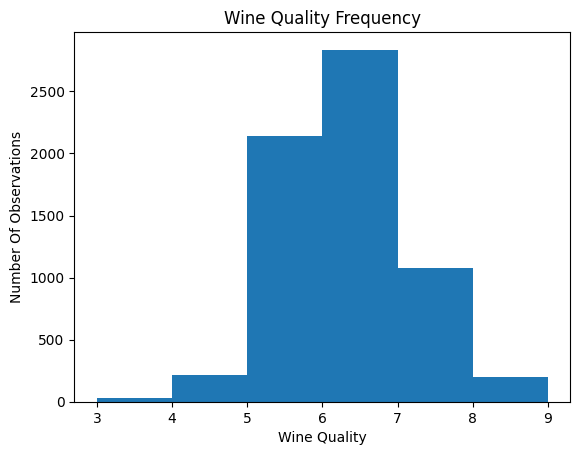

In [524]:
print("The levels of wine quality are" , wine_data["quality"].unique())
fig, ax = plt.subplots()
ax.set_ylabel('Number Of Observations')
ax.set_xlabel('Wine Quality')
ax.set_title('Wine Quality Frequency')
x = plt.hist(wine_data["quality"], bins=np.arange(3,10))



### Question 6

We want to create a new column called 'quality_new' to group these 7 levels of quality ratings and reduce them to two distinguishable levels. (10 points)

1) Create the new_quality variable as per the conditions above.
<br>
2) How many wines pass the quality test and how many fail? Display the total count of wines having a 0 quality rating level and those having a 1 quality rating level.
<br>
3) Drop the 'quality' column from the wine_data. We will be using 'quality_new' going forward.


- **Condition** We assume levels :
    - 3, 4, and 5 to be bad grade wine level. We replace any of those quality level numbers to 0 ('Fail')
    - 6, 7, 8, 9 to be good grade wine level. We replace any of those quality level numbers to 1 ('Pass')

In [525]:
BWine = wine_data.loc[wine_data["quality"] <= 5]
GWine = wine_data.loc[wine_data["quality"] >= 6]
print(BWine.shape[0], "wines failed the quality test")
print(GWine.shape[0], "wines passed the quality test")
BWine = BWine.assign(quality_new = 0)
GWine = GWine.assign(quality_new = 1)
wine_data = pd.concat([BWine,GWine])
wine_data = wine_data.drop("quality", axis = 1)
display(wine_data.tail(3))
print(wine_data.shape)

2384 wines failed the quality test
4113 wines passed the quality test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1


(6497, 12)


### Question 7
Normalize the numeric attributes using the following normalization using the following method: (x - min(x)) / (max(x) - min(x)).
<br>
**Display the first 3 rows and last 3 rows of your final output.** (10 points)

* *Hint/Optional*
    * First create a new dataframe with only numeric variables (remove 'quality_new'). Call it wine_data_num.
    * Then apply normalization on wine_data_num.
    * Then ensure to join 'quality_new' column from the original wine_data dataframe to the normalized data.
    * To ensure ensure code readability best practices, ensure your final normalized data that includes quality_new variable is called : 'wine_data_normalized'

In [526]:
temp = wine_data["quality_new"]
wine_data_num = wine_data.drop("quality_new", axis = 1)
for i in wine_data_num:
    wine_data_num[i] = (wine_data_num[i] - wine_data_num[i].min())/(wine_data_num[i].max() - wine_data_num[i].min())
wine_data_num.insert(11,"quality_new",temp)
wine_data_normalized = wine_data_num
display(wine_data_normalized.head(3))
display(wine_data_normalized.head(3))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0


- ## <font color='blue' size="4">**Read Instructions Below Prior to Proceeding with Next Questions**</font>
    * From this Question onwards, we are using the **<u>"data_wine_normalized"<u>**. *Optional: you are free to drop any other wine_data you've created along the way only if you want to.*
    * <font color='blue'>**Objective<u>**</font> :
**Our goal is to build two binary classification models to predict whether wine passes or fails the quality rating level, and evaluate their performance**
    


### Question 8
Divide the dataset to training and test sets. (10 points)

In [527]:
X = wine_data_normalized.iloc[:, :-1]
y = wine_data_normalized.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Question 9
Use the Logistic Regression algorithm to predict the quality of wine (quality_new) using its attributes. (12 points)

In [528]:
LogR = LogisticRegression(random_state = 25)
LogR.fit(X_train, y_train)
y_pred = LogR.predict(X_test)


### Question 10
Use the KNN algorithm to predict the quality of wine (quality_new) using its attributes. (12 points)

In [529]:
KNN = KNeighborsClassifier(n_neighbors=16)
KNN.fit(X_train, y_train)
y_pred2 = KNN.predict(X_test)


### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [530]:
Logconfusion = pd.crosstab(y_test, y_pred)
print("Confusion Matrix for Logistic Regression Analysis")
display(Logconfusion)
KNNconfusion = pd.crosstab(y_test, y_pred2)
print("Confusion Matrix for KNN Analysis")
display(KNNconfusion)

Confusion Matrix for Logistic Regression Analysis


col_0,0,1
quality_new,,
0,272,190
1,120,718


Confusion Matrix for KNN Analysis


col_0,0,1
quality_new,,
0,300,162
1,121,717


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. <br>
For each performance metric write <font color='red'> **only one sentence** </font> to explain what the number means, assuming you are presenting to non-technical audience.(12 points)


In [531]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [532]:
print("Accuracy measures how often the model correctly estimates the outcome \nPrecision measures how often the model correctly estimates the positive outcome correctly, \nby taking the number of actual positves divided by the number of positives reported by the model \nRecall measures how often actual positives were correctly estimated by the model")
print( "The Accuracy of the Logistic analysis is", (accuracy_score(y_test, y_pred) * 100) ,"% \nThe Precision is" , (precision_score(y_test, y_pred) * 100) ,"% \nThe Recall is" , (recall_score(y_test, y_pred) * 100) ,"%")
print( "The Accuracy of the KNN analysis is", (accuracy_score(y_test, y_pred2) * 100) ,"% \nThe Precision is" , (precision_score(y_test, y_pred2) * 100) ,"% \nThe Recall is" , (recall_score(y_test, y_pred2) * 100) ,"%")

Accuracy measures how often the model correctly estimates the outcome 
Precision measures how often the model correctly estimates the positive outcome correctly, 
by taking the number of actual positves divided by the number of positives reported by the model 
Recall measures how often actual positives were correctly estimated by the model
The Accuracy of the Logistic analysis is 76.15384615384615 % 
The Precision is 79.07488986784142 % 
The Recall is 85.68019093078759 %
The Accuracy of the KNN analysis is 78.23076923076923 % 
The Precision is 81.56996587030717 % 
The Recall is 85.56085918854416 %


This is the end of Assignment 2

Ceni Babaoglu, PhD